## <span style="color:brown;"><center> Restaurant Data Analysis </center></span>

In [1]:
# Import required Libraries
import numpy as np # for numeric and some aggregate operations
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for visuals and this is the root for seaborn
import seaborn as  sns # for visuals

In [3]:
# Read the Restaurant Data
restaurant=pd.read_csv('restaurant.csv')

### Step - 1 ----- Understand the Data

In [5]:
restaurant # complete data or dataframe

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
restaurant.head() # first 5 rows of dataframe

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
restaurant.tail() # last 5 rows of dataframe

,total_bill,tip,gender,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [11]:
restaurant.info() # structure of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   gender      244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [13]:
restaurant.shape # shape (rows and columns) of dataframe

(244, 7)

In [15]:
restaurant.columns # columns name list

Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'time', 'size'], dtype='object')

In [17]:
restaurant.nunique() # no. of unique values in dataframe columns

total_bill    229
tip           123
gender          2
smoker          2
day             4
time            2
size            6
dtype: int64

In [19]:
restaurant['gender'].unique() # unique values in a particular column

array(['Female', 'Male'], dtype=object)

### Step - 2 ----- Cleaning the Data

In [21]:
# Check null values in dataframe, if any
restaurant.isnull().sum()

total_bill    0
tip           0
gender        0
smoker        0
day           0
time          0
size          0
dtype: int64

#### So, this is Clean Data

#### So, now we could move forward to the Step --- 3 (Analysis)

## Step -3 ---- Analyse the Data and Find (get) meaning Insights

In [23]:
restaurant.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
# 1. We check the Sum of Total bill ammount
restaurant['total_bill'].sum()

4827.77

In [27]:
# 2. And now we check the Sum of Tip (round the decimal places)
restaurant['tip'].sum().round(2)

731.58

In [29]:
# 3. We check,what's the Maximum Bill amount
restaurant['total_bill'].max()

50.81

In [31]:
# 4. We check, what's the Minimum Bill Amount
restaurant['total_bill'].min()

3.07

In [33]:
# 5. We check, what's the maximum tip
restaurant['tip'].max()

10.0

In [35]:
# 6. We check, what's the minimum tip
restaurant['tip'].min()

1.0

In [37]:
# 7. So now, we want to check the relation between Total_bill amount and tip
restaurant[['total_bill','tip']].corr()  # result shows the positive co-relation

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [39]:
# 8. We want to check how many male and female paid how mach total_bill
restaurant.groupby(by='gender').total_bill.sum() # result shows male paid more bill amount than female

gender
Female    1570.95
Male      3256.82
Name: total_bill, dtype: float64

In [41]:
# 9. We want to check how many male and female give how much tip
restaurant.groupby(by='gender').tip.sum()  # result shows male give more tip than female

gender
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [43]:
# Another way to find total tip and total bill amount by gender
restaurant.pivot_table(index='gender',values=['total_bill','tip'],aggfunc='sum')

,tip,total_bill
gender,,
Female,246.51,1570.95
Male,485.07,3256.82


In [45]:
# 10. We want to know, how much bill is paid on which day
restaurant.groupby(by='day').total_bill.sum()  # result shows the maximum bill paid in Sat

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [47]:
# 11. We want to kow, how much tip is given on which day
restaurant.groupby(by='day').tip.sum()  # this result shows the maximum tip given in Sat also

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [49]:
# Another way to find total_bill and tip by day
restaurant.pivot_table(index='day',values=['total_bill','tip'],aggfunc='sum')

,tip,total_bill
day,,
Fri,51.96,325.88
Sat,260.40,1778.40
Sun,247.39,1627.16
Thur,171.83,1096.33


In [51]:
# 12. We want to know, what time customer paid how much bill amount
restaurant.groupby(by='time').total_bill.sum() # result shows in Dinner time customer paid the maximum bill amount

time
Dinner    3660.30
Lunch     1167.47
Name: total_bill, dtype: float64

In [53]:
# 13. We want to know, what time customer is given how much tip
restaurant.groupby(by='time').tip.sum()  # result shows in Dinner time customer given maximum tip

time
Dinner    546.07
Lunch     185.51
Name: tip, dtype: float64

In [55]:
# Another way to find total bill amount and tip by time
restaurant.pivot_table(index='time',values=['total_bill','tip'],aggfunc='sum')

,tip,total_bill
time,,
Dinner,546.07,3660.30
Lunch,185.51,1167.47


In [57]:
# 14. Check numerical columns with statistical methods or result to find insights
restaurant.describe() # but we don't need 'size' column

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [59]:
# So, this is categorical column but because of the numeric values Pandas think it is numeric column that's why it's shows all statistical functions to this column also.
restaurant['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [61]:
# 15. And now we need to convert it into object or categorical column
restaurant=restaurant.astype({'size':object})
restaurant.dtypes

total_bill    float64
tip           float64
gender         object
smoker         object
day            object
time           object
size           object
dtype: object

In [63]:
# 16. and now again check all statistical functions
restaurant.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [65]:
# 17. We want to filter data, and find how many male paid more than 25$ bill amount
restaurant[(restaurant.gender=='Male') & (restaurant.total_bill>25)].value_counts().sum() # result shows there are 39 male paid more the 25$ bill amount.

39

In [67]:
# 18. We want to filter data, and find how many female come to take dinner on Sat
restaurant[(restaurant.gender=='Female') & (restaurant.time=='Dinner') & (restaurant.day=='Sat')].value_counts().sum()
# result shows there are 28 female come to take dinner on sat

28

#### Now we use some visuals to find insights easily

In [69]:
restaurant.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


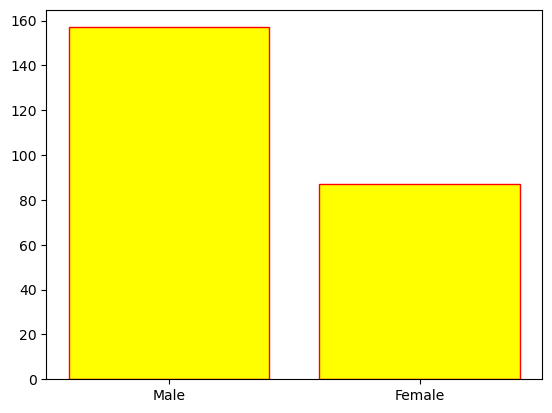

In [71]:
# 1. First we want to see, how many male and female come in restaurant using matplotlib bar plat
plt.bar(x=restaurant.gender.value_counts().index,height=restaurant.gender.value_counts().values,edgecolor='red',color='yellow')
plt.show()
# result shows more male come in restaurant than female

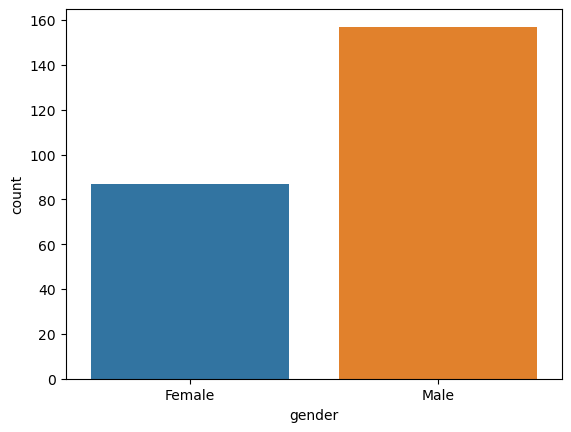

In [73]:
# Another way to find this using Seaborn count plot
sns.countplot(x=restaurant.gender)
plt.show()

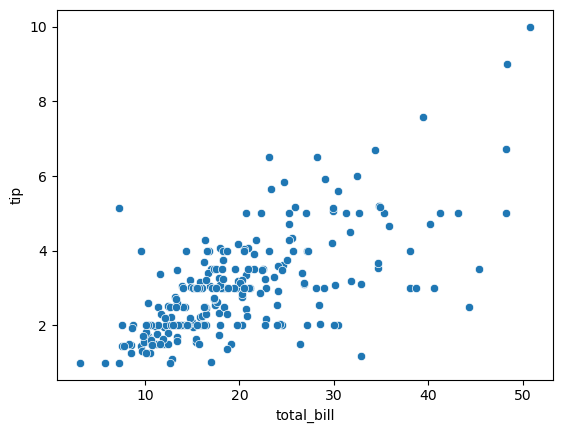

In [75]:
# 2. We want to know, the relationship between total_bill and tip
sns.scatterplot(x=restaurant.total_bill,y=restaurant.tip)
plt.show()
# result shows the positive correlation between total_bill and tip

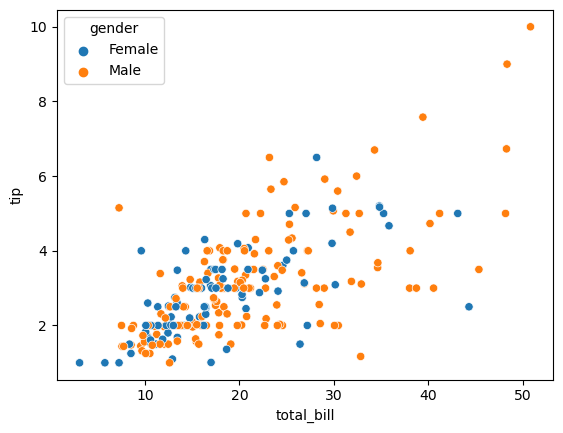

In [79]:
 # 3. We want to know relationship between total_bill and tip acc.to gender using seaborn scatter plot
sns.scatterplot(x=restaurant.total_bill,y=restaurant.tip,hue=restaurant.gender)
plt.show()
# result shows most of the time (approx. 67%, because we already find it using correlation) tip and total bill flow in same direction

In [81]:
# Find customer (male) who paid less bill amount but give more tip
restaurant[(restaurant.total_bill<10) & (restaurant.tip>5)]

,total_bill,tip,gender,smoker,day,time,size
172,7.25,5.15,Male,Yes,Sun,Dinner,2


<Axes: xlabel='total_bill'>

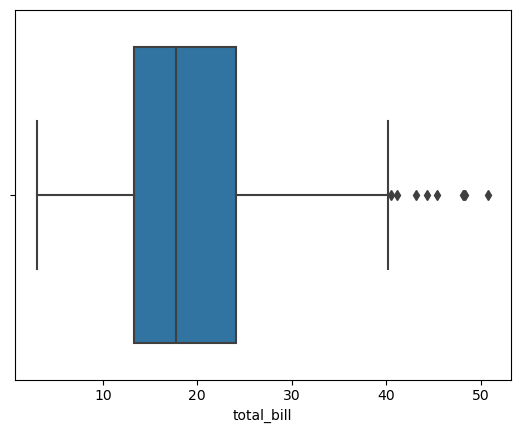

In [83]:
# 4. We want to check or find quartiles and outliers in total bill column
sns.boxplot(x=restaurant.total_bill)
# result shows some values (approx. 39, because we already find it) are outliers

In [85]:
# Find that customers who paid more than 40 > bill
restaurant[restaurant.total_bill>40].value_counts().sum() # these are outliers

10

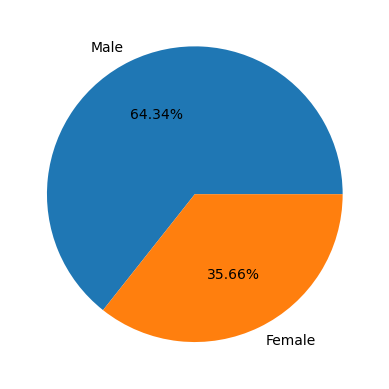

In [87]:
# 5. We want to know the ratio of male and female with the help of pie chart
plt.pie(x=restaurant.gender.value_counts().values,labels=restaurant.gender.value_counts().index,autopct='%.2f%%')
plt.show()
# result shows the ratio of male is approx. twice in comparison with the female

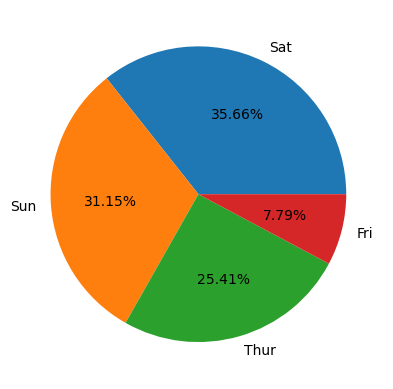

In [89]:
# 6. We want to know the ratio of days with the help of pie chart
plt.pie(x=restaurant.day.value_counts().values,labels=restaurant.day.value_counts().index,autopct='%.2f%%')
plt.show()
# result shows very few customers come in fri, and most of the customers come in Sat and Sun.

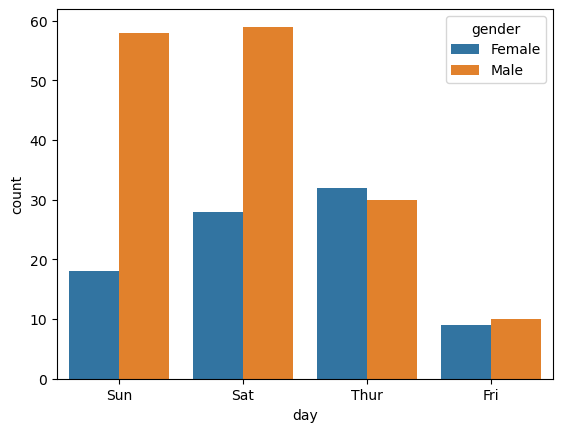

In [91]:
# 7. We want to know days when customer comes according to gender using countplot
sns.countplot(x=restaurant.day,hue=restaurant.gender)
plt.show()
# result shows in sun and sat quantity of male customer is so much high, and in Thur female is just few more than male and in fri both are few

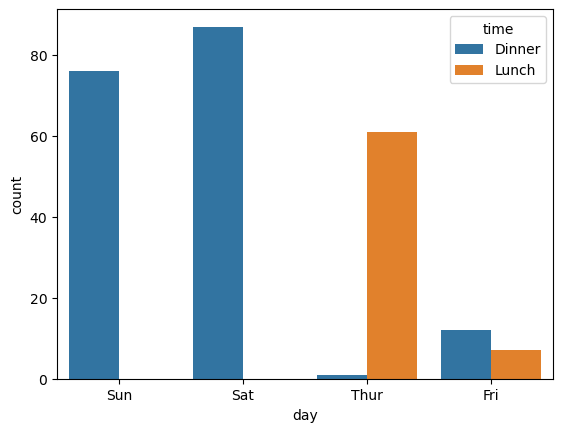

In [93]:
# 8. We want to know time when customer come, according to day
sns.countplot(x=restaurant.day,hue=restaurant.time)
plt.show()  
# result shows in Sun,sat no one for lunch and in thur most of the customer come for Lunch.

## So, the final Conclusion of this Analysis is-
1. Customers don't come for Lunch in Saturday and Sunday, and hardly any for Dinner in Thursday.
2. The majority of the customers are male, with a ratio of approximately 2:1 compared to female customers.
3. There is a positive correlation between Bill and Tip. But, sometimes, customers who have a higher bill may leave a lower tip, and vice versa.